# DSC 478 Team Project
## Adam Hecktman, Devindra “Dave” Sawh
## Consumer Services Complaints for The City of New York  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Cleansed Consumer_Services_Mediated_Complaints.csv")
df.shape

(2792, 17)

In [3]:
#drop columns not needed

df = df.drop(columns=['Complaint Result','Business Building' ,'Business Street', 'Building Address Unit', 'Business City', 'Business Zip', 'Complainant Zip', 'Longitude', 'Latitude'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2792 entries, 0 to 2791
Data columns (total 8 columns):
Business Name           2757 non-null object
Industry                2792 non-null object
Complaint Type          2616 non-null object
Mediation Start Date    2791 non-null object
Mediation Close Date    2792 non-null object
Satisfaction            2225 non-null object
Restitution             2792 non-null object
Business State          2739 non-null object
dtypes: object(8)
memory usage: 174.6+ KB


### Review the unique values of the categorical values of interest

In [4]:
df.Industry.unique()

array(['Secondhand Dealer Auto - 005', 'Tow Truck Company - 124',
       'Laundry - 064', 'Travel Agency - 440',
       'Dealer In Products For The Disabled - 119',
       'Home Improvement Contractor - 100', 'Furniture Sales - 242',
       'Misc Non-Food Retail - 817', 'Debt Collection Agency - 122',
       'Locksmith - 062', 'Retail Store - 820', 'Health Spa - 839',
       'Electronic & Home Appliance Service Dealer - 115', 'Garage - 049',
       'Restaurant - 818', 'Other', 'Electronic Store - 001',
       'Auto Rental - 213', 'Tax Preparers - 891',
       'Sightseeing Bus - 078', 'Gas Station-Retail - 815',
       'Jewelry Store-Retail - 823', 'Dry Cleaners - 230',
       'Appliances - 244', 'Employment Agency - 034', 'Supermarket - 819',
       'Grocery-Retail - 808', 'Mini-Storage Company - 830',
       'Megastore - 821', 'Funeral Homes - 888', 'Hotel/Motel - 460',
       'Parking Lot - 050', 'Ticket Seller Business',
       'Hardware-Retail - 811', 'Mailorder Misc - 319',
      

In [5]:
df['Complaint Type'].unique()

array(['Damaged Goods - D01', 'Lemon', 'Billing Dispute - B02',
       'Refund Policy - R01', 'Surcharge/Overcharge - S02',
       'Non-Delivery of Goods - N01', nan, 'Quality of Work - Q01',
       'Non-Delivery of Service - N02', 'Misrepresentation - M01',
       'Breach of Contract - B03', 'Illegal/Unfair Booting',
       'Exchange Goods/Contract Cancelled - E01',
       'Advertising/General - A01', 'Defective Goods - D02',
       'Unauthorized tow', 'Lost Property - L02',
       'Advertising/Misleading - A02', 'Credit Card Discrepancy - C01',
       'Damage / Estimate', 'Service Install - S01',
       'Outstanding Judgment - J01', 'Breach of Warranty - B04',
       'Credit Card Limitations Not Posted',
       'Cancellation/Closure Without Notice',
       'Receipt Incomplete/Not Given', 'Over Capacity',
       'Unauthorized Repair - U01', 'Health Spa - 839',
       'Unsanitary conditions', 'Advertising/Non-Availability - A03',
       'Wrong Goods - W01', 'Other - Z01', 'Closed witho

In [6]:
df['Satisfaction'].unique()

array(['No', 'Yes', nan], dtype=object)

In [7]:
df['Business State'].unique()

array(['NY', 'NC', 'GA', 'KS', 'CA', nan, 'UT', 'WI', 'NJ', 'MN', 'MS',
       'IL', 'WA', 'MI', 'TX', 'AZ', 'RI', 'FL', 'CT', 'KY', 'NH', 'OH',
       'NEW YORK', 'SC', 'NM', 'TN', 'PA', 'VA', 'MA', 'MD', 'CO', 'MO',
       'LA', 'IA', 'NV', 'DE'], dtype=object)

In [8]:
df.head()

,Business Name,Industry,Complaint Type,Mediation Start Date,Mediation Close Date,Satisfaction,Restitution,Business State
0,"MAJOR WORLD CHEVROLET, L.L.C.",Secondhand Dealer Auto - 005,Damaged Goods - D01,4/26/2019,5/9/2019,No,0,NY
1,"CYPRESS MOTORS OF RIDGEWOOD INC,",Secondhand Dealer Auto - 005,Lemon,4/11/2019,5/22/2019,Yes,2400,NY
2,FINEST AUTOMOTIVE RECOVERY INC,Tow Truck Company - 124,Billing Dispute - B02,4/10/2019,5/7/2019,Yes,60,NY
3,U NICE LAUNDRY INC,Laundry - 064,Refund Policy - R01,11/25/2019,12/10/2019,Yes,4,NY
4,LEVIA TOUR LLC,Travel Agency - 440,Surcharge/Overcharge - S02,2/1/2019,3/11/2019,NaN,0,NY


In [9]:
df.shape  

(2792, 8)

# Data Transformation

In [10]:
df[df['Satisfaction'].isnull()]  #target column with null records.  We need to delete these records.

,Business Name,Industry,Complaint Type,Mediation Start Date,Mediation Close Date,Satisfaction,Restitution,Business State
4,LEVIA TOUR LLC,Travel Agency - 440,Surcharge/Overcharge - S02,2/1/2019,3/11/2019,NaN,0,NY
5,MEDICAL EQUIPMENT REPAIRS & DISTRIBUTION INC.,Dealer In Products For The Disabled - 119,Non-Delivery of Goods - N01,1/29/2019,2/14/2019,NaN,0,NY
7,JML AUTO GROUP LLC,Secondhand Dealer Auto - 005,NaN,6/18/2019,7/16/2019,NaN,0,NY
12,LIC MOTOR GROUP LLC,Secondhand Dealer Auto - 005,Damaged Goods - D01,8/15/2019,8/20/2019,NaN,0,NY
17,COHEN'S FASHION OPTICAL OF AMERICA INC,Retail Store - 820,NaN,5/8/2019,6/27/2019,NaN,0,NY
...,...,...,...,...,...,...,...,...
2741,WATSON'S PLUMBING & HEATING INC.,Other,Misrepresentation - M01,7/30/2019,8/19/2019,NaN,0,NY
2754,"BOB'S DISCOUNT FURNITURE, LLC",Furniture Sales - 242,Damaged Goods - D01,9/12/2019,10/7/2019,NaN,0,CT
2758,NEW YORK & COMPANY,Retail Store - 820,Surcharge/Overcharge - S02,10/1/2019,10/11/2019,NaN,0,NY
2759,SYLHET MOTORS INC.,Secondhand Dealer Auto - 005,Billing Dispute - B02,5/28/2019,6/5/2019,NaN,0,NY


In [11]:
df.drop(df[df.Satisfaction.isnull()].index,axis=0, inplace = True)

In [12]:
df.shape

(2225, 8)

### Convert Restitution to float

In [13]:
#need to convert Restitution to float but need to get rid of string record
indexNames = df[ df['Restitution'] == 'Yes' ].index
print(indexNames)
df.drop(indexNames , inplace=True)
df.shape

Int64Index([318], dtype='int64')


(2224, 8)

In [14]:
#df.dropna(inplace = True) 
df['Restitution'] = df['Restitution'].astype(float) 

### Convert categorical variables to string

In [15]:
df['Industry'] = df['Industry'].astype('category') 
df['Complaint Type'] = df['Complaint Type'].astype('category') 
#df['Complaint Result'] = df['Complaint Result'].astype('category')
df['Business State'] = df['Business State'].astype('category')


### Capture start and close dates for later calculation of duration

In [16]:
df['Mediation Start Date'] = pd.to_datetime(df['Mediation Start Date'])
df['Mediation Close Date'] = pd.to_datetime(df['Mediation Close Date'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2224 entries, 0 to 2791
Data columns (total 8 columns):
Business Name           2197 non-null object
Industry                2224 non-null category
Complaint Type          2087 non-null category
Mediation Start Date    2224 non-null datetime64[ns]
Mediation Close Date    2224 non-null datetime64[ns]
Satisfaction            2224 non-null object
Restitution             2224 non-null float64
Business State          2182 non-null category
dtypes: category(3), datetime64[ns](2), float64(1), object(2)
memory usage: 116.9+ KB


In [18]:
df.head()

,Business Name,Industry,Complaint Type,Mediation Start Date,Mediation Close Date,Satisfaction,Restitution,Business State
0,"MAJOR WORLD CHEVROLET, L.L.C.",Secondhand Dealer Auto - 005,Damaged Goods - D01,2019-04-26,2019-05-09,No,0.0,NY
1,"CYPRESS MOTORS OF RIDGEWOOD INC,",Secondhand Dealer Auto - 005,Lemon,2019-04-11,2019-05-22,Yes,2400.0,NY
2,FINEST AUTOMOTIVE RECOVERY INC,Tow Truck Company - 124,Billing Dispute - B02,2019-04-10,2019-05-07,Yes,60.0,NY
3,U NICE LAUNDRY INC,Laundry - 064,Refund Policy - R01,2019-11-25,2019-12-10,Yes,4.0,NY
6,S + A REMODELLING INC.,Home Improvement Contractor - 100,Refund Policy - R01,2019-03-05,2019-04-08,Yes,10900.0,NY


### Converting categorical variables to standard spreadsheet format

In [19]:
# split each category into SSF to later to merge back to dfcopy 
# dfcopy will be in standard spreadsheet format
df_ssfIndustry = pd.get_dummies(df['Industry'])
df_ssfCompType = pd.get_dummies(df['Complaint Type'])
#df_ssfCompResult = pd.get_dummies(df['Complaint Result'])
df_ssfBusState = pd.get_dummies(df['Business State'])

In [20]:
#### made a copy of df so we don't affect the df stats and visualizations
dfcopy = df
dfcopy = dfcopy.drop(columns=['Industry', 'Complaint Type', 'Business State'])

In [21]:
dfcopy = pd.concat([dfcopy, df_ssfIndustry], axis=1).reindex(dfcopy.index)

In [22]:
dfcopy = pd.concat([dfcopy, df_ssfCompType], axis=1).reindex(dfcopy.index)

In [23]:
dfcopy = pd.concat([dfcopy, df_ssfBusState], axis=1).reindex(dfcopy.index)

In [24]:
dfcopy.head()

,Business Name,Mediation Start Date,Mediation Close Date,Satisfaction,Restitution,Appliances - 244,Auction House - 128,Auto Dealership - 212,Auto Leasing - 211,Auto Rental - 213,...,OH,PA,RI,SC,TN,TX,UT,VA,WA,WI
0,"MAJOR WORLD CHEVROLET, L.L.C.",2019-04-26,2019-05-09,No,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"CYPRESS MOTORS OF RIDGEWOOD INC,",2019-04-11,2019-05-22,Yes,2400.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,FINEST AUTOMOTIVE RECOVERY INC,2019-04-10,2019-05-07,Yes,60.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,U NICE LAUNDRY INC,2019-11-25,2019-12-10,Yes,4.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,S + A REMODELLING INC.,2019-03-05,2019-04-08,Yes,10900.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
dfcopy.shape

(2224, 144)

In [26]:
dfcopy.columns

Index(['Business Name', 'Mediation Start Date', 'Mediation Close Date',
       'Satisfaction', 'Restitution', 'Appliances - 244',
       'Auction House - 128', 'Auto Dealership - 212', 'Auto Leasing - 211',
       'Auto Rental - 213',
       ...
       'OH', 'PA', 'RI', 'SC', 'TN', 'TX', 'UT', 'VA', 'WA', 'WI'],
      dtype='object', length=144)

In [27]:
dfcopy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2224 entries, 0 to 2791
Columns: 144 entries, Business Name to WI
dtypes: datetime64[ns](2), float64(1), object(2), uint8(139)
memory usage: 406.1+ KB


In [28]:
dfcopy.head(3)

,Business Name,Mediation Start Date,Mediation Close Date,Satisfaction,Restitution,Appliances - 244,Auction House - 128,Auto Dealership - 212,Auto Leasing - 211,Auto Rental - 213,...,OH,PA,RI,SC,TN,TX,UT,VA,WA,WI
0,"MAJOR WORLD CHEVROLET, L.L.C.",2019-04-26,2019-05-09,No,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"CYPRESS MOTORS OF RIDGEWOOD INC,",2019-04-11,2019-05-22,Yes,2400.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,FINEST AUTOMOTIVE RECOVERY INC,2019-04-10,2019-05-07,Yes,60.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# General Descriptive Statistics

### Data Visualization

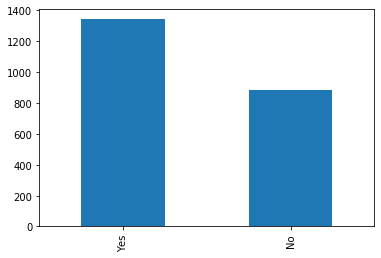

In [29]:
# Distribution of count by satisfaction
df["Satisfaction"].value_counts().plot(kind='bar')

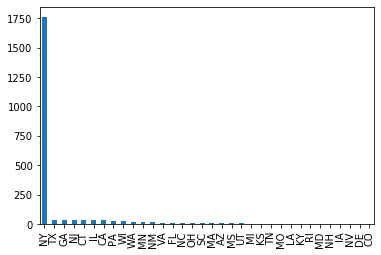

In [30]:
# Distribution of count by satisfaction
df["Business State"].value_counts().plot(kind='bar')

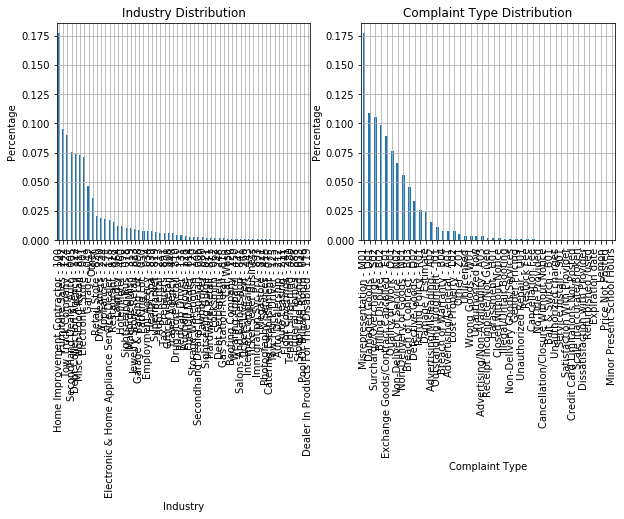

In [31]:
# Percentage Distribution by Industry and by Complaint Type
temp1 = df["Industry"].value_counts()/df["Industry"].count()
temp2 = df["Complaint Type"].value_counts()/df["Complaint Type"].count()
temp2

fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Industry')
ax1.set_ylabel('Percentage')
ax1.set_title("Industry Distribution")
temp1.plot(kind='bar', grid = True)

ax1 = fig.add_subplot(122)
ax1.set_xlabel('Complaint Type')
ax1.set_ylabel('Percentage')
ax1.set_title("Complaint Type Distribution")
temp2.plot(kind='bar', grid = True)

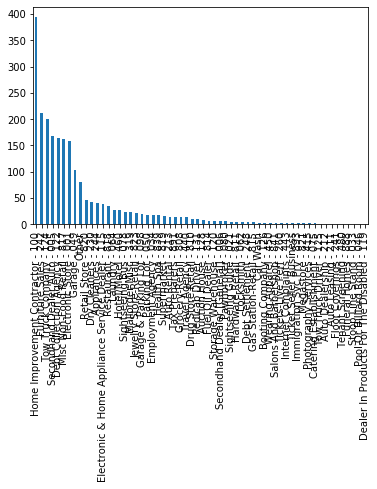

In [32]:
# Count of Complaints by Industry
df["Industry"].value_counts().plot(kind='bar')

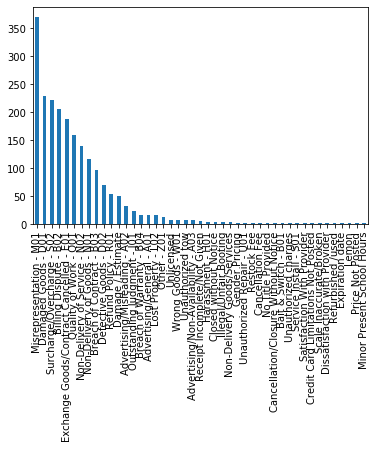

In [33]:
# Count of Complaints by Type
df["Complaint Type"].value_counts().plot(kind='bar')

In [34]:
# restitution amounts are skewed
df["Restitution"].describe()

count     2224.000000
mean       416.788669
std       2635.218632
min          0.000000
25%          0.000000
50%          0.000000
75%         62.250000
max      71928.000000
Name: Restitution, dtype: float64

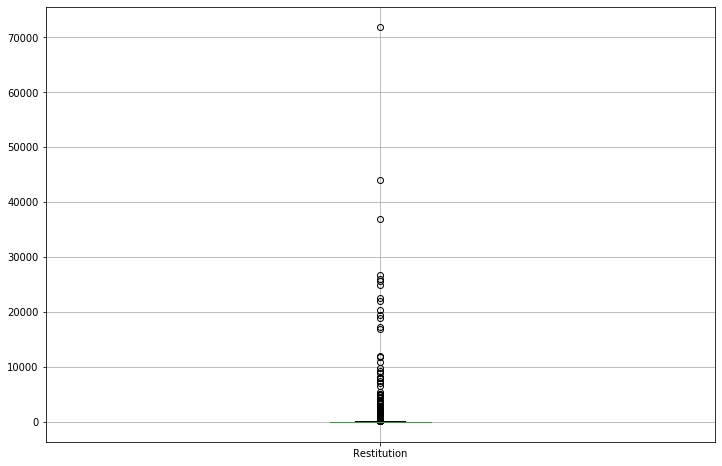

In [35]:
# Restitution distribution
df.boxplot(column=["Restitution"], return_type='axes', figsize=(12,8))

<function matplotlib.pyplot.show(*args, **kw)>

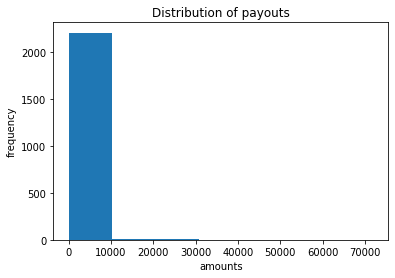

In [36]:
y = np.linspace(-1, 3000, 100) # this doesn't look consistent with the describe, which shows that 75% are 0
plt.figure()
plt.hist(df["Restitution"], bins = 7)
plt.xlabel("amounts")
plt.ylabel("frequency")
plt.title("Distribution of payouts")
plt.show

In [37]:
df["Restitution"].describe()

count     2224.000000
mean       416.788669
std       2635.218632
min          0.000000
25%          0.000000
50%          0.000000
75%         62.250000
max      71928.000000
Name: Restitution, dtype: float64

### Data Exploration

In [38]:
# DF is the dataframe we started with
df.describe()

,Restitution
count,2224.000000
mean,416.788669
std,2635.218632
min,0.000000
25%,0.000000
50%,0.000000
75%,62.250000
max,71928.000000


In [39]:
# DF Copy is in Standard Spreadsheet Format
dfcopy.describe()

,Restitution,Appliances - 244,Auction House - 128,Auto Dealership - 212,Auto Leasing - 211,Auto Rental - 213,Booting Company - 126,Car Wash,Catering Establishment - 075,Dealer In Products For The Disabled - 119,...,OH,PA,RI,SC,TN,TX,UT,VA,WA,WI
count,2224.000000,2224.000000,2224.000000,2224.000000,2224.000000,2224.000000,2224.000000,2224.000000,2224.000000,2224.000000,...,2224.000000,2224.000000,2224.000000,2224.000000,2224.000000,2224.000000,2224.000000,2224.000000,2224.000000,2224.000000
mean,416.788669,0.018435,0.004047,0.000450,0.000450,0.006295,0.001349,0.001349,0.000899,0.000450,...,0.004496,0.012140,0.001349,0.003147,0.001799,0.017086,0.002248,0.005845,0.008993,0.010342
std,2635.218632,0.134549,0.063500,0.021205,0.021205,0.079108,0.036711,0.036711,0.029981,0.021205,...,0.066919,0.109537,0.036711,0.056027,0.042381,0.129622,0.047373,0.076248,0.094424,0.101190
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,62.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,71928.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Split the data into training and testing sets

In [40]:
# drop time series
dfcopy = dfcopy.drop(columns=['Mediation Start Date'])
dfcopy = dfcopy.drop(columns=['Mediation Close Date'])

In [41]:
# drop target colum 
dfcopy = dfcopy.drop(columns=['Satisfaction'])


In [42]:
dfcopy = dfcopy.drop(columns=['Business Name'])

In [43]:
df_target = df["Satisfaction"]

In [44]:
from sklearn.model_selection import train_test_split
df_train, df_test, df_target_train, df_target_test = train_test_split(dfcopy, df_target, test_size=0.2, random_state=33)


### KNN Model

In [45]:
from sklearn import neighbors, tree, naive_bayes

In [46]:
#create the object
n_neighbors = 10
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(df_train, df_target_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='distance')

In [47]:
knnpreds_test = knnclf.predict(df_test)
print(knnpreds_test)

['No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'Yes' 'No'
 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'No' 'No' 'Yes' 'No' 'No'
 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'Yes' 'No' 'Yes' 'No'
 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'No' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'No'
 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No'
 'Yes' 'No' 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'Yes' 'No' 'No' 'No'
 'No' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'No' 'No' 'Yes' 'No'
 'No' 'No' 'No' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'Yes'
 'No' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'No'
 'No' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'No'
 'Yes' 'Yes' 'No' 'Yes' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'No' 'No'
 'Yes' 'Yes' 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'Yes'

In [48]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [49]:
print(classification_report(df_target_test, knnpreds_test))

              precision    recall  f1-score   support

          No       0.67      0.87      0.75       177
         Yes       0.89      0.71      0.79       268

    accuracy                           0.78       445
   macro avg       0.78      0.79      0.77       445
weighted avg       0.80      0.78      0.78       445



In [50]:
knncm = confusion_matrix(df_target_test, knnpreds_test)
print(knncm)

[[154  23]
 [ 77 191]]


In [51]:
print(knnclf.score(df_test, df_target_test))

0.7752808988764045


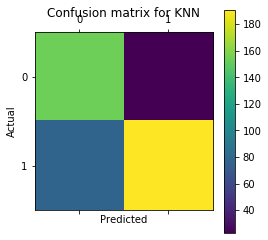

In [52]:
### Plot the confusion matrix

import pylab as plt
%matplotlib inline
plt.matshow(knncm)
plt.title('Confusion matrix for KNN')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Decision Tree 

#### Initial run using Gini as purity function

In [53]:
# we started with using Gini as our purity function
treeclf = tree.DecisionTreeClassifier(criterion= 'gini', max_leaf_nodes = 10) #max_leaf_nodes

In [54]:
treeclf = treeclf.fit(df_train, df_target_train)

In [55]:
treepreds_test = treeclf.predict(df_test)
print(treepreds_test)

['Yes' 'No' 'Yes' 'Yes' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'Yes' 'No'
 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'No' 'No' 'Yes' 'No' 'No'
 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'Yes' 'No' 'Yes' 'No'
 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No'
 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'No'
 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No'
 'Yes' 'No' 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'No'
 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No'
 'Yes' 'No' 'No' 'Yes' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'Yes' 'No'
 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'No' 'No'
 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'Yes'
 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'Yes'
 'No' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'No' 'No' 'Yes'
 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'Yes' 'No' 'No' '

In [56]:
print(treeclf.score(df_test, df_target_test))

0.7685393258426966


In [57]:
print(treeclf.get_depth())
print(treeclf.get_n_leaves())
print(treeclf.get_params)

7
10
<bound method BaseEstimator.get_params of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')>


In [58]:
from sklearn.model_selection import cross_val_score

In [59]:
cv_scores = cross_val_score(treeclf, df_test, df_target_test, cv=10)
print(cv_scores)

[0.73333333 0.8        0.75555556 0.77777778 0.75555556 0.82222222
 0.75555556 0.68181818 0.72093023 0.81395349]


In [60]:
print(treeclf.score(df_train, df_target_train))

0.7807757166947723


#### Accuracy of 77%

In [61]:
print(classification_report(df_target_test, treepreds_test))

              precision    recall  f1-score   support

          No       0.65      0.92      0.76       177
         Yes       0.93      0.67      0.78       268

    accuracy                           0.77       445
   macro avg       0.79      0.79      0.77       445
weighted avg       0.82      0.77      0.77       445



In [62]:
treecm = confusion_matrix(df_target_test, treepreds_test)
print(treecm)

[[163  14]
 [ 89 179]]


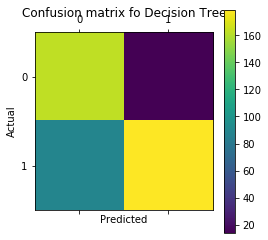

In [63]:
### Plot the confusion matrix

import pylab as plt
%matplotlib inline
plt.matshow(treecm)
plt.title('Confusion matrix fo Decision Tree')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

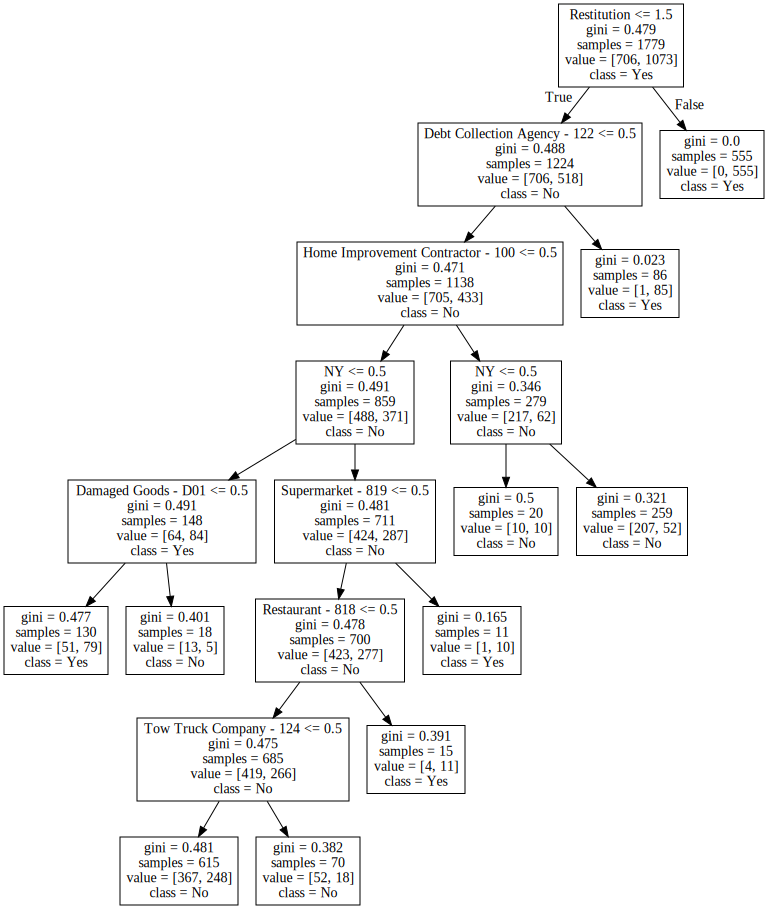

In [64]:
### Visualizing the Tree
from sklearn.tree import export_graphviz

from IPython.display import SVG
from graphviz import Source
from IPython.display import display

#which one do we put first, yes or no for the class names
tree = export_graphviz(treeclf, out_file='tree.html', feature_names=df_train.columns, class_names=['No','Yes'])
import graphviz

with open("tree.html") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph, format="png")

In [65]:
#display(SVG(graph.pipe(format='svg')))

### Next using Grid Search for optimized Decision Tree parameters 

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.model_selection import cross_val_score

In [67]:
dt = tree.DecisionTreeClassifier()

In [68]:
parameters = {
    'criterion': ['entropy','gini'],
    'max_depth': np.linspace(3, 15, 10, dtype=int),
    'min_samples_leaf': np.linspace(5, 30, 10, dtype=int),
    'min_samples_split': np.linspace(10, 20, 10, dtype=int), 
    'max_leaf_nodes' : np.linspace(2, 12, 3, dtype=int),
    
}

In [69]:
gs = GridSearchCV(dt, parameters, verbose=1, cv=5)

In [70]:
%time _ = gs.fit(df_train, df_target_train)

gs.best_params_, gs.best_score_

Fitting 5 folds for each of 6000 candidates, totalling 30000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Wall time: 3min 54s


[Parallel(n_jobs=1)]: Done 30000 out of 30000 | elapsed:  3.9min finished


({'criterion': 'entropy',
  'max_depth': 7,
  'max_leaf_nodes': 7,
  'min_samples_leaf': 30,
  'min_samples_split': 10},
 0.7734682405845981)

In [71]:
# using best parameters from the above grid search results.
treeclfOpt = tree.DecisionTreeClassifier(criterion= 'entropy', max_leaf_nodes = 7, max_depth = 7, min_samples_leaf= 30, min_samples_split= 10) #max_leaf_nodes

In [72]:
treeclfOpt = treeclfOpt.fit(df_train, df_target_train)

In [73]:
treepreds_test = treeclfOpt.predict(df_test)
print(treepreds_test)

['Yes' 'No' 'Yes' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'No' 'Yes' 'No'
 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'Yes'
 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'Yes' 'No' 'Yes' 'No'
 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No'
 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'No'
 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No'
 'Yes' 'No' 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'No'
 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No'
 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'Yes' 'No'
 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'No' 'Yes'
 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'Yes' 'Yes' 'No' 'Yes'
 'Yes' 'No' 'Yes' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'Yes'
 'No' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'No' 'No' 'Yes'
 'Yes' 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'N

In [74]:
print(treeclfOpt.score(df_test, df_target_test))

0.7842696629213484


In [75]:
cv_scores = cross_val_score(treeclfOpt, df_test, df_target_test, cv=10)
print(cv_scores)

[0.73333333 0.82222222 0.77777778 0.75555556 0.71111111 0.8
 0.77777778 0.63636364 0.72093023 0.86046512]


#### Accuracy still 77%

In [76]:
print(treeclfOpt.score(df_train, df_target_train))

0.7740303541315345


In [77]:
print(classification_report(df_target_test, treepreds_test))

              precision    recall  f1-score   support

          No       0.67      0.89      0.77       177
         Yes       0.91      0.71      0.80       268

    accuracy                           0.78       445
   macro avg       0.79      0.80      0.78       445
weighted avg       0.82      0.78      0.79       445



In [78]:
treecm = confusion_matrix(df_target_test, treepreds_test)
print(treecm)

[[158  19]
 [ 77 191]]


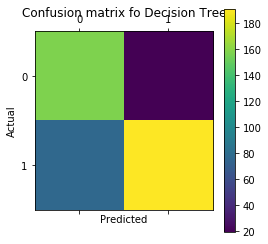

In [79]:
### Plot the confusion matrix

import pylab as plt
%matplotlib inline
plt.matshow(treecm)
plt.title('Confusion matrix fo Decision Tree')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

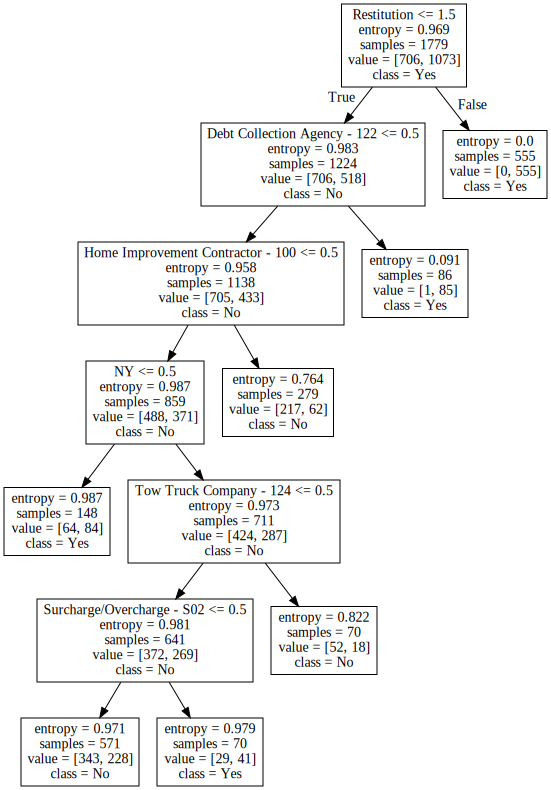

In [80]:
### Visualizing the Tree
from sklearn.tree import export_graphviz

from IPython.display import SVG
from graphviz import Source
from IPython.display import display

#which one do we put first, yes or no for the class names
tree = export_graphviz(treeclfOpt, out_file='tree.html', feature_names=df_train.columns, class_names=['No','Yes'])
import graphviz

with open("tree.html") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph, format="png")

### Adding Duration column based on Mediation Close and Start dates
#### Added a Duration column and re-ran classifiers to see if it impacts the accuracy

In [81]:
from datetime import datetime as dt

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2224 entries, 0 to 2791
Data columns (total 8 columns):
Business Name           2197 non-null object
Industry                2224 non-null category
Complaint Type          2087 non-null category
Mediation Start Date    2224 non-null datetime64[ns]
Mediation Close Date    2224 non-null datetime64[ns]
Satisfaction            2224 non-null object
Restitution             2224 non-null float64
Business State          2182 non-null category
dtypes: category(3), datetime64[ns](2), float64(1), object(2)
memory usage: 116.9+ KB


In [83]:
duration = df['Mediation Close Date'] - df['Mediation Start Date']

In [84]:
#duration = pd.DataFrame(duration)

In [85]:
duration = duration.dt.days

In [86]:
duration.shape

(2224,)

In [87]:
duration[0:10]

0     13
1     41
2     27
3     15
6     34
8     37
9     29
10    31
11     3
13    46
dtype: int64

In [88]:
duration.describe()

count    2224.000000
mean       26.214029
std        14.759888
min       -43.000000
25%        15.000000
50%        24.000000
75%        36.000000
max        84.000000
dtype: float64

#### Create a copy of dfcopy and add duration 

In [89]:
dfcopyWithDuration = pd.concat([dfcopy, duration], axis=1).reindex(dfcopy.index)

In [90]:
dfcopyWithDuration.shape

(2224, 141)

## ReRun KNN with the dfcopyWithDuraction to see if the accuracy goes up with Duration

In [91]:
from sklearn.model_selection import train_test_split
df_train, df_test, df_target_train, df_target_test = train_test_split(dfcopyWithDuration, df_target, test_size=0.2, random_state=22)

print(df_test.shape)
df_test[0:5]

(445, 141)


,Restitution,Appliances - 244,Auction House - 128,Auto Dealership - 212,Auto Leasing - 211,Auto Rental - 213,Booting Company - 126,Car Wash,Catering Establishment - 075,Dealer In Products For The Disabled - 119,...,PA,RI,SC,TN,TX,UT,VA,WA,WI,0
2772,773.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
1232,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,29
658,90.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,22
879,0.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,40
540,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,64


In [92]:
dfcopyWithDuration.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2224 entries, 0 to 2791
Columns: 141 entries, Restitution to 0
dtypes: float64(1), int64(1), uint8(139)
memory usage: 354.0 KB


In [93]:
#create the object
n_neighbors = 10
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(df_train, df_target_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='distance')

In [94]:
knnpreds_test = knnclf.predict(df_test)
print(knnpreds_test)

['Yes' 'No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'No' 'Yes'
 'No' 'No' 'No' 'Yes' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'No' 'Yes' 'Yes'
 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'No'
 'No' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes'
 'No' 'No' 'Yes' 'Yes' 'Yes' 'No' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes'
 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'Yes' 'Yes'
 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'Yes'
 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No'
 'No' 'No' 'Yes' 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'No'
 'Yes' 'Yes' 'No' 'No' 'No' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'No' 'No'
 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'Yes' 'No' 'Yes' 'Yes' 'No'
 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'No' 'No' 'No' 'Yes' 'No'
 'Yes' 'Yes' 'Yes' 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'No' 'Yes'
 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'No' 'No' 'No' '

#### Accuracy now up to 82% using Duration

In [95]:
print(classification_report(df_target_test, knnpreds_test))

              precision    recall  f1-score   support

          No       0.73      0.88      0.80       185
         Yes       0.90      0.77      0.83       260

    accuracy                           0.82       445
   macro avg       0.82      0.83      0.82       445
weighted avg       0.83      0.82      0.82       445



In [96]:
knncm = confusion_matrix(df_target_test, knnpreds_test)
print(knncm)

[[163  22]
 [ 59 201]]


In [97]:
print(knnclf.score(df_test, df_target_test))

0.8179775280898877


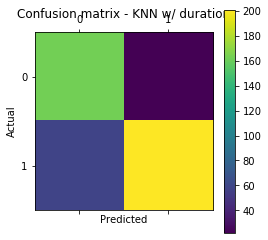

In [98]:
### Plot the confusion matrix

import pylab as plt
%matplotlib inline
plt.matshow(knncm)
plt.title('Confusion matrix - KNN w/ duration')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Regression Analysis 

#### Below, we found that the distrbution of data was not conducive to linear regression analysis
#### A different type of regression technique will need to be used

In [99]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn import preprocessing

In [100]:
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit(df_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [101]:
df_train_norm = min_max_scaler.fit_transform(df_train)
df_test_norm = min_max_scaler.fit_transform(df_test)

In [102]:
df_train_norm.shape

(1779, 141)

<function matplotlib.pyplot.show(*args, **kw)>

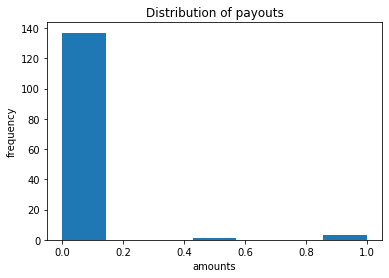

In [103]:
y = np.linspace(-1, 3000, 100) # this doesn't look consistent with the describe, which shows that 75% are 0
plt.figure()
plt.hist(df_train_norm[0], bins = 7)
plt.xlabel("amounts")
plt.ylabel("frequency")
plt.title("Distribution of payouts")
plt.show

In [104]:
# Create linear regression object
linreg = LinearRegression()

In [105]:
dfcopyWithDuration[0].shape

(2224,)

In [106]:
y = np.array(dfcopyWithDuration["Restitution"])

In [107]:

x = np.array(dfcopyWithDuration[0])

In [108]:
x1 = np.reshape(x, (2224, 1))

In [109]:
x1.shape

(2224, 1)

In [110]:
x2 = np.array([np.concatenate((v,[1])) for v in x1])

In [111]:
linreg.fit(x2,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [112]:
for i in range(10):
    pred = linreg.predict(np.array([x2[i]]))[0]
    print("%2d \t %2.2f \t %2.2f" % (i, pred, y[i]))

 0 	 435.30 	 0.00
 1 	 396.07 	 2400.00
 2 	 415.69 	 60.00
 3 	 432.50 	 4.00
 4 	 405.88 	 10900.00
 5 	 401.68 	 0.00
 6 	 412.89 	 0.00
 7 	 410.08 	 0.00
 8 	 449.31 	 0.00
 9 	 389.07 	 0.00


In [113]:
import pylab as pl

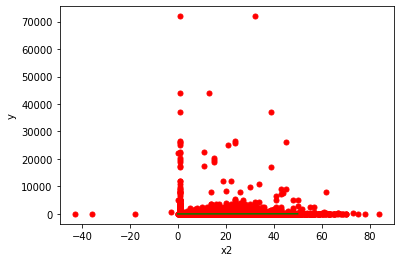

In [114]:
# Plot predicted against actual (in the training data)
%matplotlib inline
pl.plot(x2, y,'ro', markersize=5)
pl.plot([0,50],[0,50], 'g-')
pl.xlabel('x2')
pl.ylabel('y')
pl.show()

## Clustering Model
### Here we use a custom cosine similarity-based distance funciton and the kMeans from the Machine Learning in Action book

In [115]:
def distCosSim(vecA, vecB):
    ''
    numDotproduct =  np.dot(vecA, vecB)
    vectAss = sqrt(sum(power(vecA,2)))
    vectBss = sqrt(sum(power(vecB,2)))
    CosSim = numDotproduct/(vectAss*vectBss)
    return (1-CosSim) 

In [116]:
def randCent(dataSet, k):
    n = shape(dataSet)[1]
    centroids = zeros((k,n), dtype=float)
    for j in range(n): #create random cluster centers
        minJ = min(dataSet[:,j])
        rangeJ = float(max(dataSet[:,j]) - minJ)
        centroids[:,j] = minJ + rangeJ * random.rand(k)
    return centroids 




In [117]:
def kMeans(dataSet, k, distMeas, createCent=randCent):
    'updated function to paramertize distMeasure'
    m = shape(dataSet)[0]
    clusterAssment = zeros((m,2)) #create mat to assign data points 
                                  #to a centroid, also holds SE of each point
    centroids = createCent(dataSet, k)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m): #for each data point assign it to the closest centroid
            minDist = inf; minIndex = -1
            for j in range(k):
                distJI = distMeas(centroids[j,:],dataSet[i,:])
                if distJI < minDist:
                    minDist = distJI; minIndex = j
            if clusterAssment[i,0] != minIndex: clusterChanged = True
            clusterAssment[i,:] = minIndex,minDist**2
        # print centroids
        for cent in range(k):#recalculate centroids
            ptsInClust = dataSet[nonzero(clusterAssment[:,0]==cent)[0]] #get all the point in this cluster - Note: this was incorrect in the original distribution.
            if(len(ptsInClust)!=0):
                centroids[cent,:] = mean(ptsInClust, axis=0) #assign centroid to mean - Note condition was added 10/28/2013
    return centroids, clusterAssment

In [118]:
dfcopyWithDuration.head()

,Restitution,Appliances - 244,Auction House - 128,Auto Dealership - 212,Auto Leasing - 211,Auto Rental - 213,Booting Company - 126,Car Wash,Catering Establishment - 075,Dealer In Products For The Disabled - 119,...,PA,RI,SC,TN,TX,UT,VA,WA,WI,0
0,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13
1,2400.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,41
2,60.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,27
3,4.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
6,10900.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,34


In [119]:
dfcopyWithDurationArr = np.array(dfcopyWithDuration)
df_targetArr = np.array(df_target)


In [120]:
from sklearn.model_selection import train_test_split
df_train, df_test, df_target_train, df_target_test = train_test_split(dfcopyWithDurationArr, df_targetArr, test_size=0.2, random_state=22)

print(df_test.shape)
df_test[0:5]

(445, 141)


array([[773.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  15.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,

In [121]:
from numpy import *

In [122]:
dfcopyWithDurationArr = np.array(dfcopyWithDuration)
df_targetArr = np.array(df_target)
df_trainArr = np.array(df_train)

In [123]:
cent, clusAssmnt = kMeans(df_trainArr, 3, distCosSim, createCent=randCent)

In [124]:
print('centroid', cent.shape,  '/n', 'cluster assment',clusAssmnt.shape)

centroid (3, 141) /n cluster assment (1779, 2)


In [125]:
trainDF = pd.DataFrame(df_train, columns=dfcopyWithDuration.columns)

#### Show the centroids for the 3 clusters

In [126]:
centDF = pd.DataFrame(cent, columns = dfcopyWithDuration.columns)  #cluster targets 
centDF

,Restitution,Appliances - 244,Auction House - 128,Auto Dealership - 212,Auto Leasing - 211,Auto Rental - 213,Booting Company - 126,Car Wash,Catering Establishment - 075,Dealer In Products For The Disabled - 119,...,PA,RI,SC,TN,TX,UT,VA,WA,WI,0
0,1350.489484,0.017208,0.007648,0.0,0.0,0.005736,0.003824,0.0000,0.0000,0.0000,...,0.021033,0.001912,0.000,0.0000,0.022945,0.0000,0.001912,0.007648,0.005736,23.145315
1,0.260800,0.018400,0.003200,0.0,0.0,0.004000,0.000000,0.0024,0.0016,0.0008,...,0.010400,0.000800,0.004,0.0032,0.013600,0.0032,0.007200,0.010400,0.012000,27.553600
2,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0000,0.0000,0.0000,...,0.000000,0.000000,0.000,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000,-16.166667


In [127]:
NYCclusters = pd.DataFrame(clusAssmnt, columns=["Cluster", "MinDistance**2"])
NYCclusters

,Cluster,MinDistance**2
0,1.0,6.956708e-05
1,0.0,6.050510e-10
2,1.0,7.954763e-06
3,1.0,4.072606e-06
4,1.0,1.263234e-05
...,...,...
1774,1.0,1.494820e-03
1775,1.0,5.867805e-07
1776,1.0,2.299957e-07
1777,1.0,2.696897e-07


In [128]:
#record index for each cluster to get labels
centDictDocIndx = dict()
for c in range(len(centDF)):  #use cluster total to iterate 
    centDictDocIndx[c] = NYCclusters.index[NYCclusters["Cluster"] == c]  #add to dict where ech key is a cluster and return the value as the indx of each doc
print(centDictDocIndx)

{0: Int64Index([   1,    7,    9,   11,   12,   13,   14,   18,   20,   21,
            ...
            1726, 1732, 1736, 1737, 1740, 1746, 1753, 1762, 1763, 1766],
           dtype='int64', length=523), 1: Int64Index([   0,    2,    3,    4,    5,    6,    8,   10,   15,   16,
            ...
            1769, 1770, 1771, 1772, 1773, 1774, 1775, 1776, 1777, 1778],
           dtype='int64', length=1250), 2: Int64Index([100, 335, 1013, 1075, 1234, 1384], dtype='int64')}


#### Important note.  The variable "0" is actually a variable denoting that a Debt Collection Agency was involved in the complaint.

In [129]:
for j in range(3):
    streamPD = pd.DataFrame()
    temp =  dict()
    test = pd.DataFrame()
    for i in centDictDocIndx[j]:
        streamPD =  streamPD.append(trainDF.iloc[i])  # vs_trainDF.iloc[i]
        for (columnName, columnData) in streamPD.iteritems():
            counter = 0
            for z in columnData:
                if z > 0:
                    counter = counter + 1
                    temp[columnName] = counter
    test= test.append(temp,ignore_index=True,sort=True)
    table = test.T
    table.columns = ['freq']

    print("Cluster", j)
    print('Total records in cluster', len(streamPD))
    print()
    print('Top 10 attributes for each cluster')
    table['Record %'] = table['freq']/len(streamPD)
    print(table.nlargest(10,'freq'))
    print()
    print('-----------------')



Cluster 0
Total records in cluster 523

Top 10 attributes for each cluster
                                          freq  Record %
Restitution                              523.0  1.000000
0                                        519.0  0.992352
NY                                       400.0  0.764818
Misrepresentation - M01                   97.0  0.185468
Tow Truck Company - 124                   82.0  0.156788
Billing Dispute - B02                     59.0  0.112811
Surcharge/Overcharge - S02                58.0  0.110899
Damaged Goods - D01                       49.0  0.093690
Electronic Store - 001                    47.0  0.089866
Exchange Goods/Contract Cancelled - E01   47.0  0.089866

-----------------
Cluster 1
Total records in cluster 1250

Top 10 attributes for each cluster
                                           freq  Record %
0                                        1250.0    1.0000
NY                                       1006.0    0.8048
Home Improvement Contractor -

#### Homogeneity, completeness, and v-measure scores indicate a poor quality of clusters

In [130]:
from sklearn.metrics import completeness_score,homogeneity_score


print('Completeness score', end = '  ')
print(completeness_score(df_target_train,NYCclusters['Cluster']))
print('homogeneity score', end = '   ')
print(homogeneity_score(df_target_train,NYCclusters['Cluster']))

Completeness score  0.29526628074987205
homogeneity score   0.27643370245142246


In [131]:
completeness = completeness_score(df_target_train,NYCclusters['Cluster'])
homogeneity = homogeneity_score(df_target_train,NYCclusters['Cluster'])

In [132]:
print("V-measure: ", 2 * ((homogeneity * completeness) / (homogeneity + completeness)))

V-measure:  0.28553980617490937


##   Singular Value Decomposition-- used to reduce the dimensions of the data set 
### Run against the dataframe that includes duration (dfcopyWIthDuration)

In [133]:
from sklearn.model_selection import train_test_split
df_train, df_test, df_target_train, df_target_test = train_test_split(dfcopyWithDuration, df_target, test_size=0.2, random_state=22)

print(df_test.shape)
df_test[0:5]

(445, 141)


,Restitution,Appliances - 244,Auction House - 128,Auto Dealership - 212,Auto Leasing - 211,Auto Rental - 213,Booting Company - 126,Car Wash,Catering Establishment - 075,Dealer In Products For The Disabled - 119,...,PA,RI,SC,TN,TX,UT,VA,WA,WI,0
2772,773.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
1232,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,29
658,90.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,22
879,0.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,40
540,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,64


In [134]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import random as sparse_random
from sklearn.random_projection import sparse_random_matrix

In [135]:
svd = TruncatedSVD(n_components=1, n_iter=7, random_state=42)

In [136]:
df_trainTRANS = svd.fit_transform(df_train)

In [137]:
df_testTRANS = svd.fit_transform(df_test)

In [138]:
print(df_testTRANS)

[[7.73010038e+02]
 [1.97681863e-02]
 [9.00149656e+01]
 [2.72424570e-02]
 [4.36072677e-02]
 [2.90006761e+02]
 [2.40002739e+03]
 [2.72513568e-02]
 [5.00008755e+02]
 [1.00001816e+03]
 [3.50012877e+02]
 [2.24779120e-02]
 [1.08986933e-02]
 [1.36394778e-02]
 [2.04330811e-02]
 [2.52021787e-02]
 [4.36021030e+02]
 [2.80011552e+02]
 [8.87085818e-03]
 [3.74777049e-02]
 [1.29587424e-02]
 [2.11306712e-02]
 [1.70440701e-02]
 [2.38536397e-02]
 [8.19578356e-03]
 [5.00027824e+02]
 [2.72604909e-02]
 [1.77246786e-02]
 [1.90876462e-02]
 [9.55400520e-03]
 [2.31569864e-02]
 [1.00019741e+02]
 [1.43209712e-02]
 [2.31729042e-02]
 [2.72600173e-02]
 [2.73582347e-03]
 [2.07565176e-03]
 [1.77277206e-02]
 [3.61152068e-02]
 [1.50015427e-02]
 [1.84085544e-02]
 [1.80001663e+03]
 [2.00001318e+03]
 [2.04508089e-02]
 [1.77240927e-02]
 [1.43197312e-02]
 [1.50024171e-02]
 [3.00001992e+02]
 [2.11146463e-02]
 [1.70013752e+01]
 [4.90016931e+02]
 [2.00013758e+01]
 [4.39679987e+04]
 [2.86235382e-02]
 [1.70277791e-02]
 [6.401226

### The first component explains over 99% of the variation in the data

In [139]:
print(svd.explained_variance_ratio_)

[0.99998741]


In [140]:
print(svd.explained_variance_ratio_.sum())

0.9999874056618056


In [141]:
#use the same parameters from the grid search result and now the SVD transformation
from sklearn import tree

treeclfOpt = tree.DecisionTreeClassifier(criterion= 'entropy', max_leaf_nodes = 12, max_depth = 7, min_samples_leaf= 24, min_samples_split= 10) #max_leaf_nodes

In [142]:
treeclfOpt = treeclfOpt.fit(df_trainTRANS, df_target_train)

In [143]:
treepreds_test = treeclfOpt.predict(df_testTRANS)
print(treepreds_test)

['Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes

In [144]:
testTarg = pd.DataFrame(df_target_test)

#### The accuracy actually decreased significantly (from 82% to 59%)

In [145]:
print(treeclfOpt.score(df_testTRANS, testTarg))

0.5910112359550562
